In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as sk_prep
import sklearn.model_selection as sk_ms
from tensorflow import keras

## Import Dataset

In [231]:
dataset_df = pd.read_csv('train.csv')
dataset_df

/var/folders/g0/db_6133s4c72c83lmc3808m40000gn/T/ipykernel_16852/569309689.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931
...,...,...,...,...,...,...,...,...,...,...
1001594,1111,2,2013-01-01,0,0,0,0,a,1,225066
1001595,1112,2,2013-01-01,0,0,0,0,a,1,775592
1001596,1113,2,2013-01-01,0,0,0,0,a,1,135205
1001597,1114,2,2013-01-01,0,0,0,0,a,1,954751


In [232]:
store_df = pd.read_csv('store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Data Exploration

In [233]:
dataset_df = dataset_df.merge(store_df, on=['Store'], how='inner')
dataset_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-17,4852,519,1,1,0,0,303445,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-16,4427,517,1,1,0,0,324709,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-15,4767,550,1,1,0,0,64663,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-14,5042,544,1,1,0,0,704685,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-13,5054,553,1,1,0,0,308477,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1115,6,2013-01-05,4771,339,1,0,0,1,1011927,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1001595,1115,5,2013-01-04,4540,326,1,0,0,1,898124,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1001596,1115,4,2013-01-03,4297,300,1,0,0,1,75596,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1001597,1115,3,2013-01-02,3697,305,1,0,0,1,707118,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [234]:
dataset_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Id,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,1.001599e+06,998999.000000,683207.000000,683207.000000,1.001599e+06,501184.000000,501184.000000
mean,5.584364e+02,3.998315e+00,5.770573e+03,6.333030e+02,8.296454e-01,3.818944e-01,1.734596e-01,5.085189e+05,5430.478119,7.222837,2008.690561,5.003839e-01,23.263887,2011.752602
std,3.219092e+02,1.997350e+00,3.852568e+03,4.649430e+02,3.759442e-01,4.858511e-01,3.786443e-01,2.934647e+05,7716.186258,3.211857,5.989484,5.000001e-01,14.095374,1.662700
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.000000,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.722000e+03,4.040000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.544410e+05,710.000000,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.741000e+03,6.100000e+02,1.000000e+00,0.000000e+00,0.000000e+00,5.088100e+05,2330.000000,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.854000e+03,8.380000e+02,1.000000e+00,1.000000e+00,0.000000e+00,7.626425e+05,6890.000000,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.017207e+06,75860.000000,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [235]:
len(dataset_df['Store'].unique())

1115

In [236]:
len(dataset_df['Date'].unique())

928

<AxesSubplot: xlabel='StoreType', ylabel='count'>

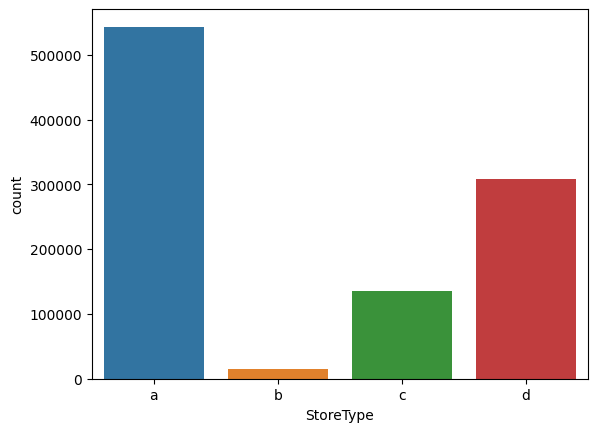

In [237]:
sns.countplot(x=dataset_df['StoreType'], order=np.sort(dataset_df['StoreType'].unique()))

<AxesSubplot: xlabel='Assortment', ylabel='count'>

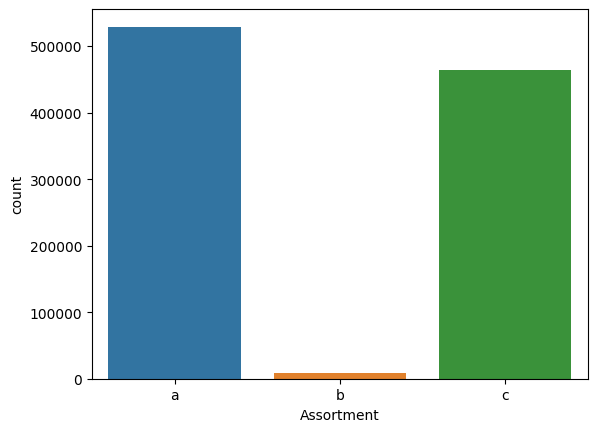

In [238]:
sns.countplot(x=dataset_df['Assortment'], order=np.sort(dataset_df['Assortment'].unique()))

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

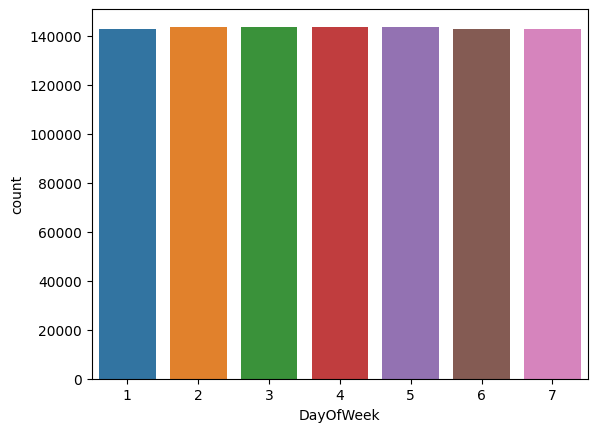

In [239]:
sns.countplot(x=dataset_df['DayOfWeek'])

<AxesSubplot: xlabel='Sales', ylabel='Count'>

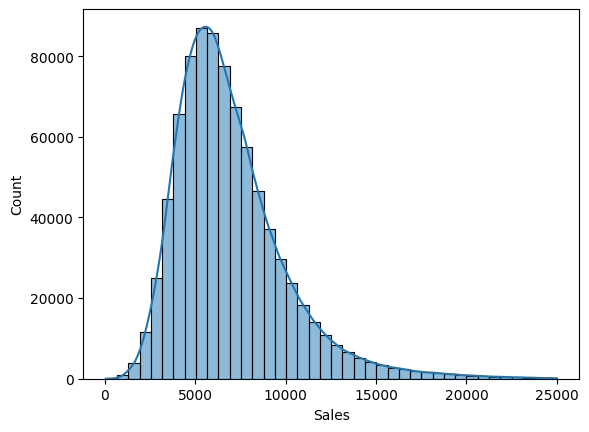

In [240]:
sns.histplot(
  x=dataset_df['Sales'][(dataset_df['Sales'] > 0) & (dataset_df['Sales'] < 25000)],
  thresh=1,
  kde=True,
  bins=40,
)

In [241]:
np.median(dataset_df['Sales'])

5741.0

<AxesSubplot: xlabel='Customers', ylabel='Count'>

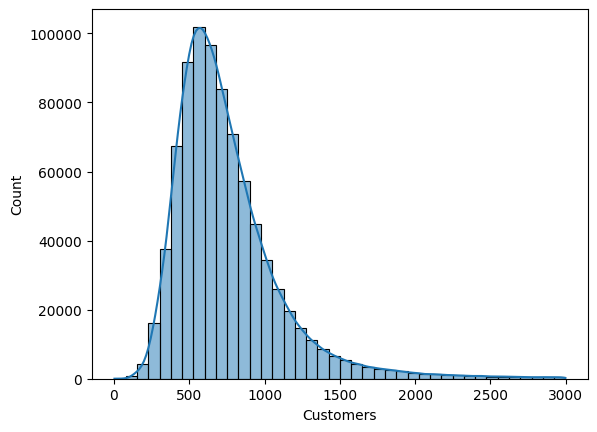

In [242]:
sns.histplot(
  x=dataset_df['Customers'][(dataset_df['Customers'] > 0) & (dataset_df['Customers'] < 3000)],
  thresh=1,
  kde=True,
  bins=40,
)

In [243]:
np.median(dataset_df['Customers'])

610.0

In [244]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001599 entries, 0 to 1001598
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1001599 non-null  int64  
 1   DayOfWeek                  1001599 non-null  int64  
 2   Date                       1001599 non-null  object 
 3   Sales                      1001599 non-null  int64  
 4   Customers                  1001599 non-null  int64  
 5   Open                       1001599 non-null  int64  
 6   Promo                      1001599 non-null  int64  
 7   StateHoliday               1001599 non-null  object 
 8   SchoolHoliday              1001599 non-null  int64  
 9   Id                         1001599 non-null  int64  
 10  StoreType                  1001599 non-null  object 
 11  Assortment                 1001599 non-null  object 
 12  CompetitionDistance        998999 non-null   float64
 13  CompetitionO

In [245]:
dataset_df["DayOfWeek"].value_counts()

5    143615
4    143615
3    143435
2    143434
1    142500
7    142500
6    142500
Name: DayOfWeek, dtype: int64

In [246]:
dataset_df['date'] = pd.to_datetime(dataset_df['Date'], infer_datetime_format=True)
dataset_df["month"] = dataset_df["date"].dt.month
dataset_df["quarter"] = dataset_df["date"].dt.quarter
dataset_df["year"] = dataset_df["date"].dt.year
dataset_df["day"] = dataset_df["date"].dt.day
dataset_df["week"] = dataset_df["date"].dt.week
dataset_df['season'] = ((dataset_df['date'].dt.month % 12 + 3) // 3).map({1: 'winter', 2: 'spring', 3:'summer', 4:'autumn'})
dataset_df.drop(columns=['Date', 'date'], inplace=True)
dataset_df

/var/folders/g0/db_6133s4c72c83lmc3808m40000gn/T/ipykernel_16852/1797757040.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset_df["week"] = dataset_df["date"].dt.week


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,quarter,year,day,week,season
0,1,5,4852,519,1,1,0,0,303445,c,...,0,NaN,NaN,NaN,7,3,2015,17,29,summer
1,1,4,4427,517,1,1,0,0,324709,c,...,0,NaN,NaN,NaN,7,3,2015,16,29,summer
2,1,3,4767,550,1,1,0,0,64663,c,...,0,NaN,NaN,NaN,7,3,2015,15,29,summer
3,1,2,5042,544,1,1,0,0,704685,c,...,0,NaN,NaN,NaN,7,3,2015,14,29,summer
4,1,1,5054,553,1,1,0,0,308477,c,...,0,NaN,NaN,NaN,7,3,2015,13,29,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1115,6,4771,339,1,0,0,1,1011927,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,5,1,winter
1001595,1115,5,4540,326,1,0,0,1,898124,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,4,1,winter
1001596,1115,4,4297,300,1,0,0,1,75596,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,3,1,winter
1001597,1115,3,3697,305,1,0,0,1,707118,d,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,1,2013,2,1,winter


array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'DayOfWeek'}>,
        <AxesSubplot: title={'center': 'Sales'}>,
        <AxesSubplot: title={'center': 'Customers'}>],
       [<AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'Promo'}>,
        <AxesSubplot: title={'center': 'SchoolHoliday'}>,
        <AxesSubplot: title={'center': 'Id'}>],
       [<AxesSubplot: title={'center': 'CompetitionDistance'}>,
        <AxesSubplot: title={'center': 'CompetitionOpenSinceMonth'}>,
        <AxesSubplot: title={'center': 'CompetitionOpenSinceYear'}>,
        <AxesSubplot: title={'center': 'Promo2'}>],
       [<AxesSubplot: title={'center': 'Promo2SinceWeek'}>,
        <AxesSubplot: title={'center': 'Promo2SinceYear'}>,
        <AxesSubplot: title={'center': 'month'}>,
        <AxesSubplot: title={'center': 'quarter'}>],
       [<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'day'}>,
        <Ax

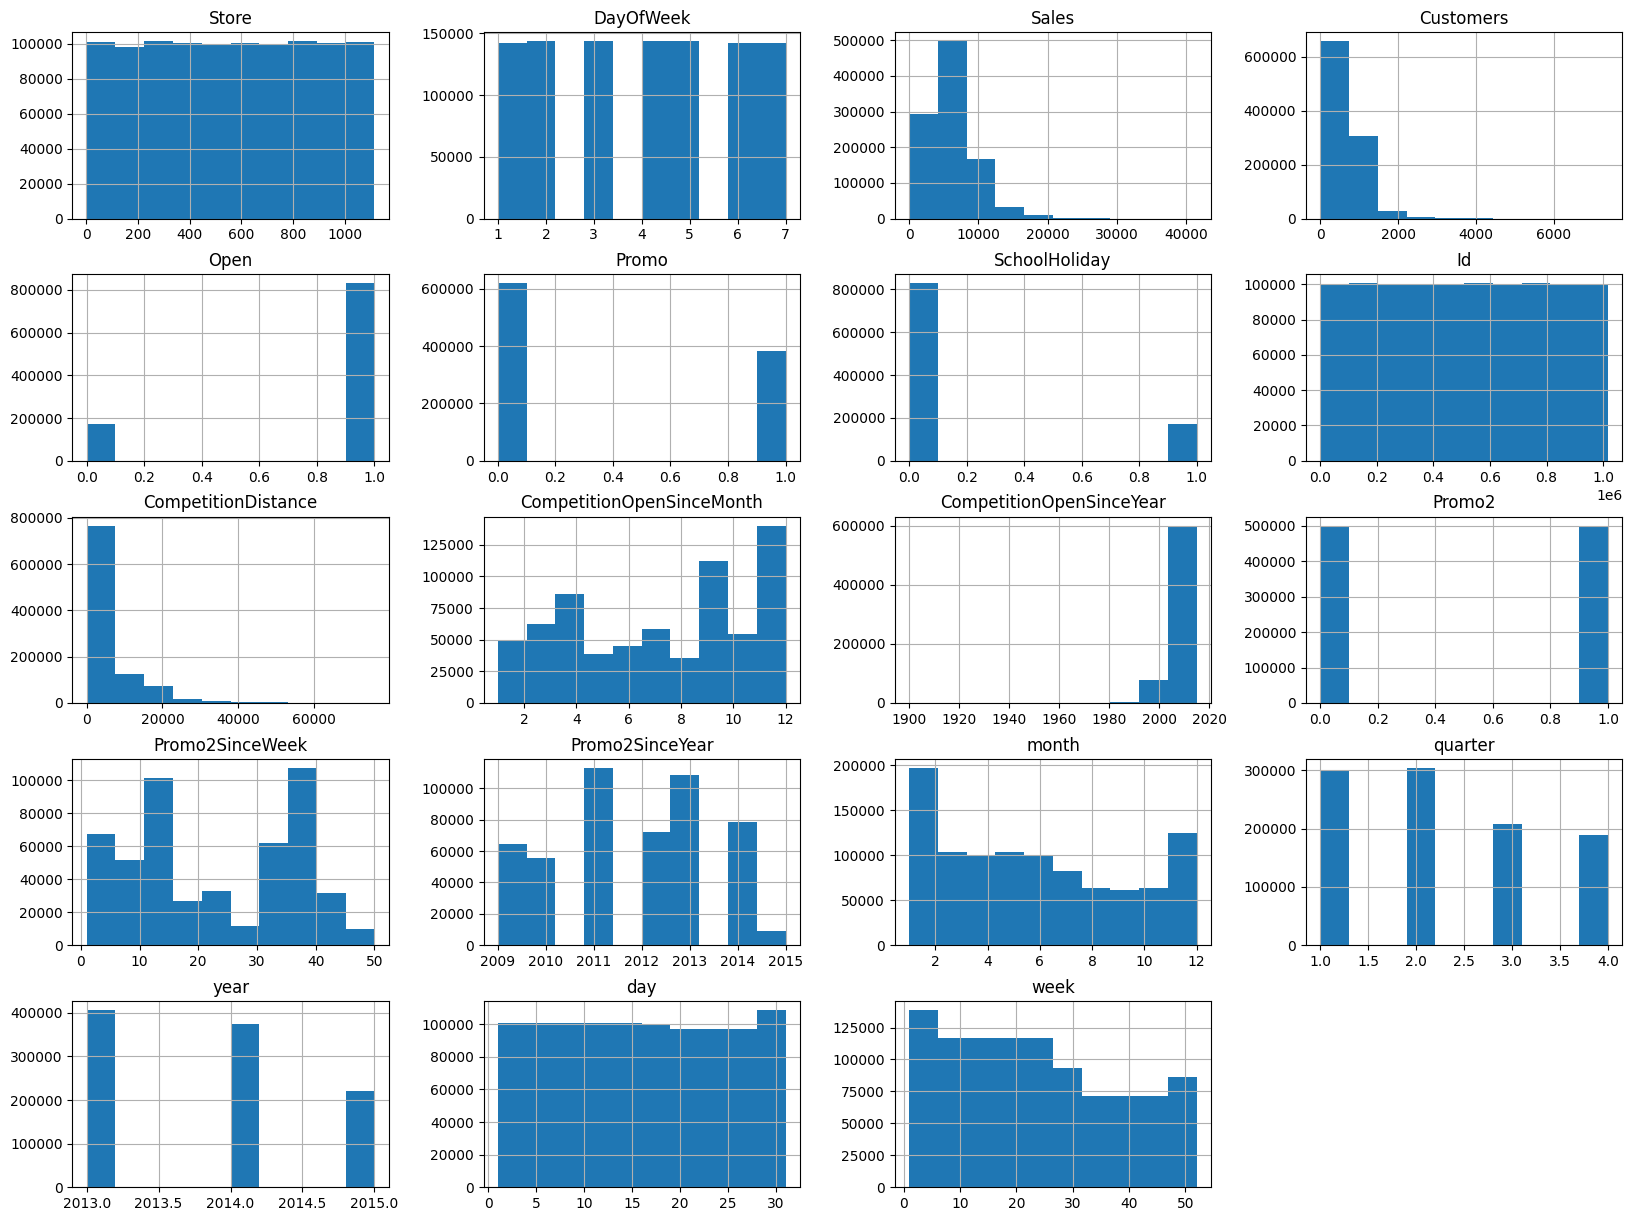

In [247]:
dataset_df.hist(figsize=(20, 15))

In [248]:
dataset_df.isnull().sum() / len(dataset_df) * 100

Store                         0.000000
DayOfWeek                     0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
Id                            0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259585
CompetitionOpenSinceMonth    31.788370
CompetitionOpenSinceYear     31.788370
Promo2                        0.000000
Promo2SinceWeek              49.961611
Promo2SinceYear              49.961611
PromoInterval                49.961611
month                         0.000000
quarter                       0.000000
year                          0.000000
day                           0.000000
week                          0.000000
season                        0.000000
dtype: float64

In [249]:
dataset_df.drop(
  columns=[
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    'PromoInterval',
  ],
  inplace=True,
)
dataset_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,Promo2,month,quarter,year,day,week,season
0,1,5,4852,519,1,1,0,0,303445,c,a,1270.0,0,7,3,2015,17,29,summer
1,1,4,4427,517,1,1,0,0,324709,c,a,1270.0,0,7,3,2015,16,29,summer
2,1,3,4767,550,1,1,0,0,64663,c,a,1270.0,0,7,3,2015,15,29,summer
3,1,2,5042,544,1,1,0,0,704685,c,a,1270.0,0,7,3,2015,14,29,summer
4,1,1,5054,553,1,1,0,0,308477,c,a,1270.0,0,7,3,2015,13,29,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1115,6,4771,339,1,0,0,1,1011927,d,c,5350.0,1,1,1,2013,5,1,winter
1001595,1115,5,4540,326,1,0,0,1,898124,d,c,5350.0,1,1,1,2013,4,1,winter
1001596,1115,4,4297,300,1,0,0,1,75596,d,c,5350.0,1,1,1,2013,3,1,winter
1001597,1115,3,3697,305,1,0,0,1,707118,d,c,5350.0,1,1,1,2013,2,1,winter


In [250]:
dataset_df["CompetitionDistance"] = dataset_df["CompetitionDistance"].fillna(np.median(dataset_df["CompetitionDistance"].mode()))

<AxesSubplot: xlabel='season', ylabel='Sales'>

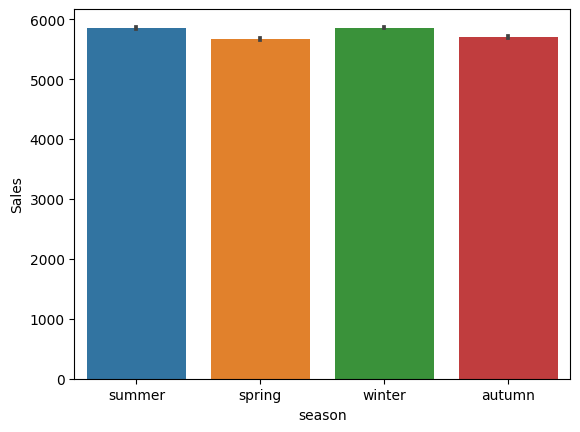

In [251]:
sns.barplot(dataset_df, x='season', y='Sales')

<AxesSubplot: xlabel='Assortment', ylabel='Sales'>

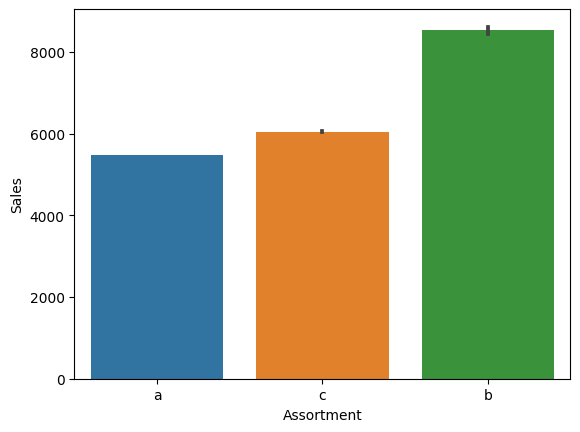

In [252]:
sns.barplot(dataset_df, x='Assortment', y='Sales')

<AxesSubplot: xlabel='StoreType', ylabel='Sales'>

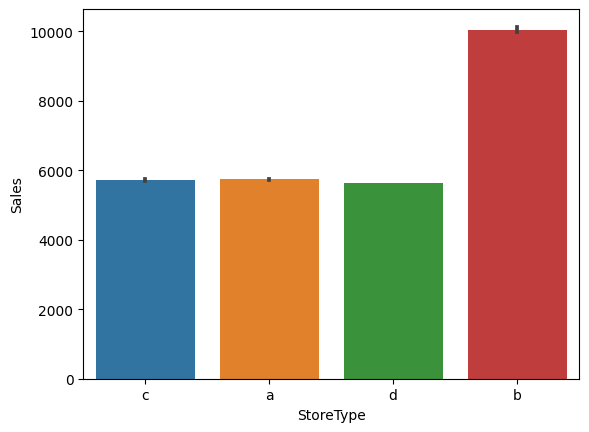

In [253]:
sns.barplot(dataset_df, x='StoreType', y='Sales')

In [254]:
sklearn.preprocessing

<module 'sklearn.preprocessing' from '/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/__init__.py'>

In [255]:
categorical_columns = ['DayOfWeek', 'quarter', 'month', 'year', 'StoreType', 'Assortment', 'season']

for column in categorical_columns:
  label_encoder = sk_prep.LabelEncoder()
  array = label_encoder.fit_transform(dataset_df[column]).reshape(-1, 1)

  one_hot_encoder = sk_prep.OneHotEncoder(sparse=False)
  column_names = [f'{column}_{i}' for i in label_encoder.classes_]
  part_df = pd.DataFrame(one_hot_encoder.fit_transform(array), columns=column_names)
  dataset_df = pd.concat([dataset_df, part_df], axis=1)

dataset_df.drop(columns=categorical_columns, inplace=True)

dataset_df

/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/vladimirskvortsov/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/preprocessing/

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,CompetitionDistance,Promo2,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,season_autumn,season_spring,season_summer,season_winter
0,1,4852,519,1,1,0,0,303445,1270.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,4427,517,1,1,0,0,324709,1270.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,4767,550,1,1,0,0,64663,1270.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,5042,544,1,1,0,0,704685,1270.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,5054,553,1,1,0,0,308477,1270.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001594,1115,4771,339,1,0,0,1,1011927,5350.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1001595,1115,4540,326,1,0,0,1,898124,5350.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1001596,1115,4297,300,1,0,0,1,75596,5350.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1001597,1115,3697,305,1,0,0,1,707118,5350.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [256]:
dataset_df['StateHoliday'] = np.where(dataset_df['StateHoliday'] == '0', 0, 1)
dataset_df['StateHoliday'].unique()

array([0, 1])

## Split data

In [257]:
x_train, x_test, y_train, y_test = sk_ms.train_test_split(
  dataset_df.drop(columns=['Sales']),
  dataset_df['Sales'],
  test_size=0.2,
)

x_train, x_val, y_train, y_val = sk_ms.train_test_split(
  x_train,
  y_train,
  test_size=0.1,
)

dataset_df['Sales']

0          4852
1          4427
2          4767
3          5042
4          5054
           ... 
1001594    4771
1001595    4540
1001596    4297
1001597    3697
1001598       0
Name: Sales, Length: 1001599, dtype: int64

## Model Baseline Performance

In [258]:
abs(y_test - y_train.mean()).mean()

2883.8826350432014

## Model

In [278]:
model = keras.models.Sequential([
  keras.layers.Dense(512, input_dim=x_test.shape[1], activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(1, activation='linear'),
])

In [279]:
model.compile(
  optimizer='adam',
  loss='mean_squared_error',
  metrics=['mean_absolute_error']
)

In [281]:
history = model.fit(
  x_train.values,
  y_train.values,
  validation_data=(x_val, y_val),
  epochs=15,
  batch_size=64
)

Epoch 1/15
11268/11268 [==============================] - 84s 7ms/step - loss: 1799451.8750 - mean_absolute_error: 874.3930 - val_loss: 1715125.6250 - val_mean_absolute_error: 850.7139
Epoch 2/15
11268/11268 [==============================] - 86s 8ms/step - loss: 1741073.2500 - mean_absolute_error: 861.0484 - val_loss: 1593935.7500 - val_mean_absolute_error: 805.6271
Epoch 3/15
11268/11268 [==============================] - 84s 7ms/step - loss: 1672152.5000 - mean_absolute_error: 845.1383 - val_loss: 1872272.3750 - val_mean_absolute_error: 887.4196
Epoch 4/15
11268/11268 [==============================] - 86s 8ms/step - loss: 1630621.2500 - mean_absolute_error: 838.0226 - val_loss: 1736302.6250 - val_mean_absolute_error: 883.1667
Epoch 5/15
11268/11268 [==============================] - 86s 8ms/step - loss: 1613117.6250 - mean_absolute_error: 835.2363 - val_loss: 1442541.8750 - val_mean_absolute_error: 791.8539
Epoch 6/15
11268/11268 [==============================] - 85s 8ms/step - lo

In [282]:
model.evaluate(x_test.values, y_test.values)

6260/6260 [==============================] - 22s 4ms/step - loss: 1315747.2500 - mean_absolute_error: 744.6143


[1315747.25, 744.6143188476562]

In [286]:
dataset_df.memory_usage().sum() / 1024 / 1024

382.07969665527344